In [1]:
import numpy as np
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change the file path for the file movie.metadata.tsv
# file_path = "movie.metadata.tsv"

# local path
file_path = "C:/Users/Eylul/OneDrive/Desktop/ada_project/MovieSummaries/movie.metadata.tsv"

In [3]:
# Reading the file into a pandas dataframe
movie_summaries = pd.read_csv(file_path, sep="\t", header=None)
movie_summaries.columns = ["Wikipedia movie ID",
 "Freebase_movie_ID",
 "Movie_name",
 "Movie_release_date",
 "Movie_box_office_revenue",
 "Movie_runtime",
 "Movie_languages",
 "Movie_countries",
 "Movie_genres"]
movie_summaries.head()

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
# Remove prefix '/m/'
movie_summaries['Freebase_movie_ID'] = movie_summaries['Freebase_movie_ID'].str.replace('/m/', '')

In [5]:
# Create new columns for languages, countries and genres
# The data type of the new columns is list containing all possible values
# Only take the values into account for now,
# If we need the code for further analysis, just apply x.keys() instead of x.values()

movie_summaries['Movie_languages_clean'] = movie_summaries['Movie_languages'].apply(ast.literal_eval).apply(lambda x: list(x.values()))
movie_summaries['Movie_countries_clean'] = movie_summaries['Movie_countries'].apply(ast.literal_eval).apply(lambda x: list(x.values()))
movie_summaries['Movie_genres_clean'] = movie_summaries['Movie_genres'].apply(ast.literal_eval).apply(lambda x: list(x.values()))

In [6]:
# Extract the release year
# This column only contains the years
movie_summaries['Movie_release_year'] = movie_summaries['Movie_release_date'].str.extract(r'(\d{4})')

# Convert strings to datetime values if there are
# For the rows with only years, the value is replaced by NaT
# pd.to_datetime has a bug if the format provided is more "precise" than what is in the dataframe, it has default values and will not 
# raise an error or replace with NaT
# specifically %Y-%m-%d with year 2000 defaults to 2000-01-01, even with the exact=True argument.

movie_summaries['Movie_release_date_datetime'] = movie_summaries['Movie_release_date'].astype('str').apply(
        lambda x: pd.to_datetime(x if "-" in x else pd.NaT, errors="coerce")
)

In [7]:
movie_summaries.head()

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_languages_clean,Movie_countries_clean,Movie_genres_clean,Movie_release_year,Movie_release_date_datetime
0,975900,03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,2001-08-24
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,2000-02-16
2,28463795,0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,NaT
3,9363483,0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,NaT
4,261236,01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],1983,NaT


In [8]:
# Create a dictionary to count the number of movies for each language
language_count = {}

# Iterate through the 'movie_languages_clean' column and count occurrences of each language
for languages in movie_summaries['Movie_languages_clean']:
    for language in languages:
        if language in language_count:
            language_count[language] += 1
        else:
            language_count[language] = 1

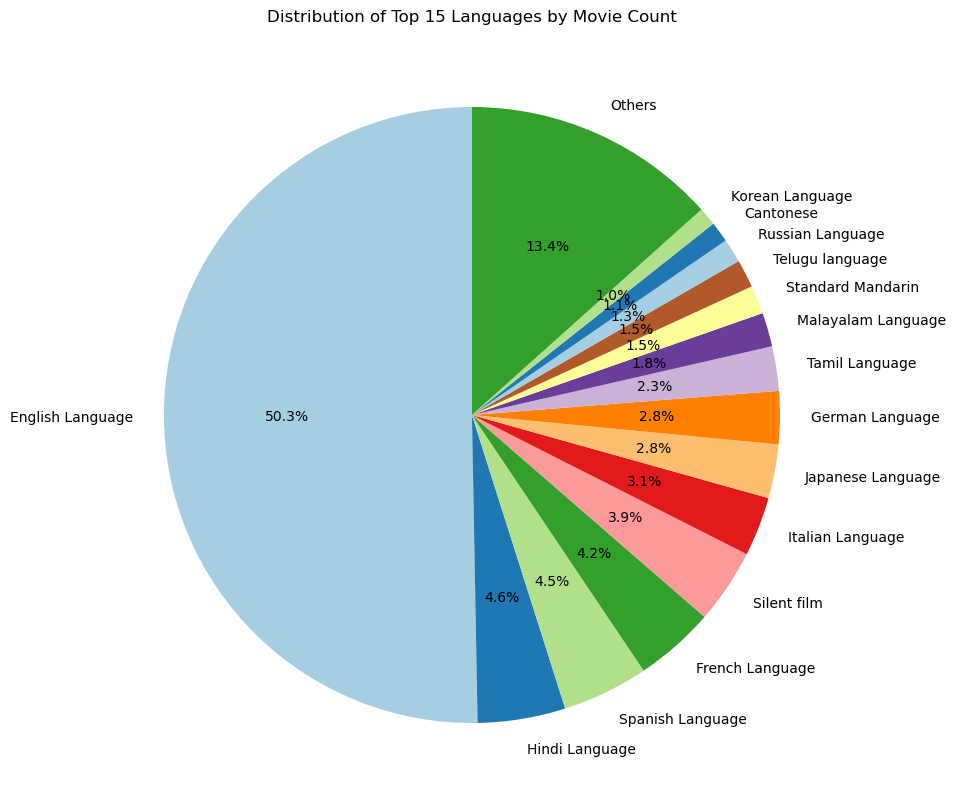

In [9]:
# Convert the dictionary to a pandas DataFrame for easy plotting
df_language_count = pd.DataFrame(list(language_count.items()), columns=['Language', 'Movie Count'])

# Sort the DataFrame by Movie Count for better visualization
df_language_count = df_language_count.sort_values(by='Movie Count', ascending=False)

# Number of top languages that will be shown in the plot
top_languages_count = 15  

# Select the top N languages
top_languages = df_language_count.head(top_languages_count)

# Create a new row for 'Others' and sum the counts
others_count = df_language_count.iloc[top_languages_count:]['Movie Count'].sum()
others_row = pd.DataFrame({'Language': ['Others'], 'Movie Count': [others_count]})

# Concatenate the top languages and 'Others'
df_language_combined = pd.concat([top_languages, others_row])

# Plotting a pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_language_combined['Movie Count'], labels=df_language_combined['Language'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Distribution of Top {top_languages_count} Languages by Movie Count')
plt.show()

The dataset shows a significant dominance of movies in the English language. This is a common trend in global cinema, as English is a widely spoken and understood language. This dominance may indicate a bias toward English-language films in the dataset.

In [10]:
# genre count
genres_count = {}

for genres in movie_summaries['Movie_genres_clean']:
    for genre in genres:
        if genre in genres_count:
            genres_count[genre] += 1
        else:
            genres_count[genre] = 1

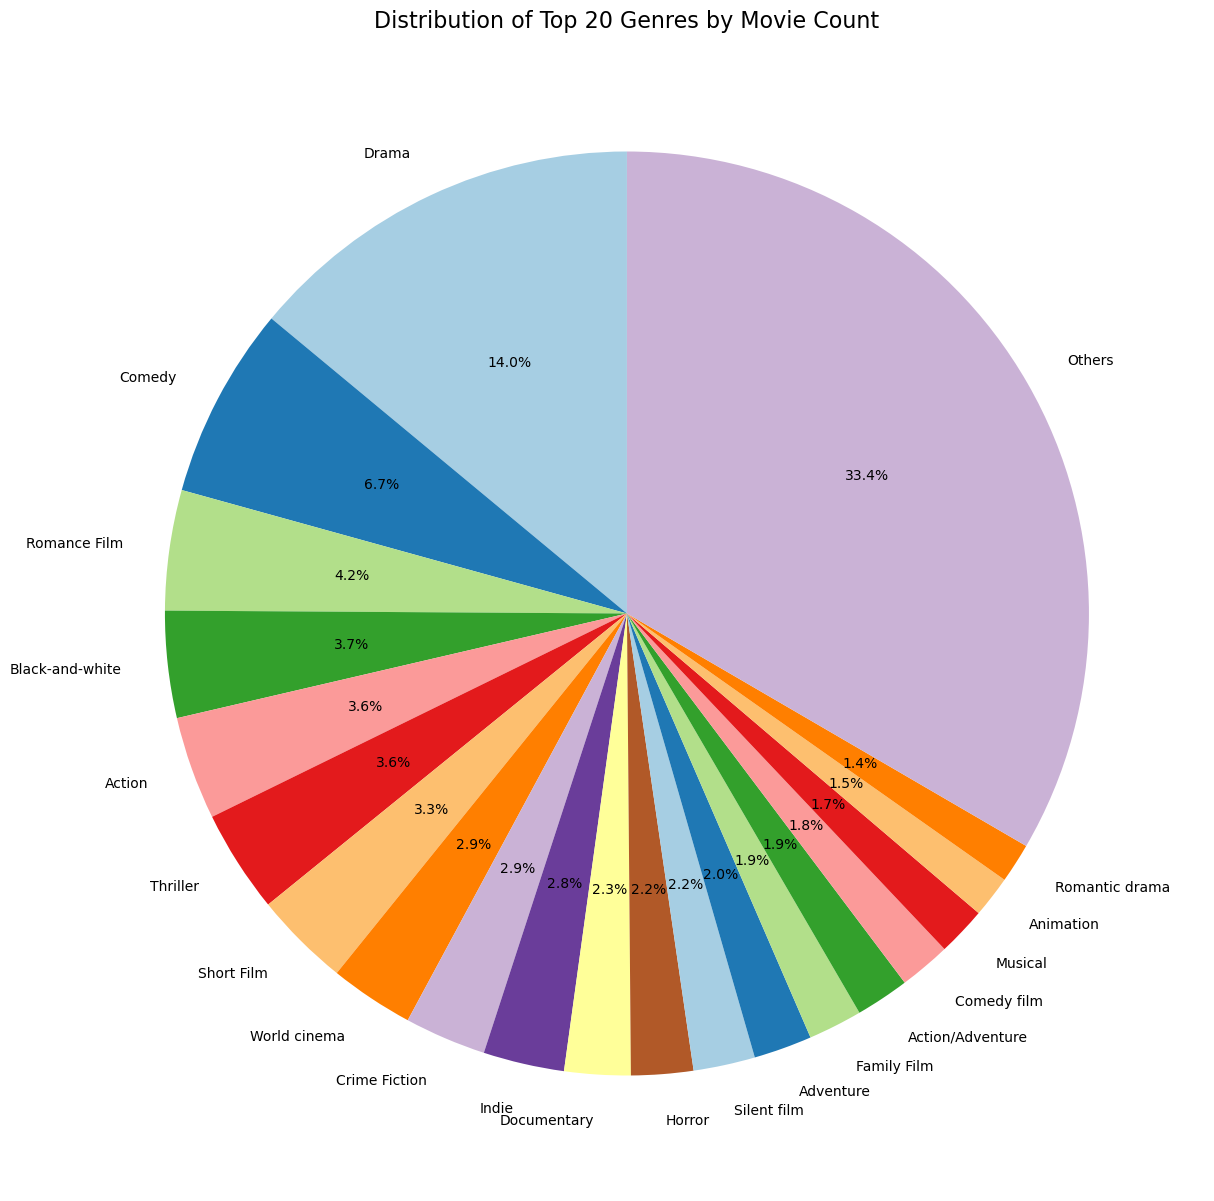

In [11]:
# Convert the dictionary to a pandas DataFrame for easy plotting
df_genres_count = pd.DataFrame(list(genres_count.items()), columns=['Genre', 'Movie Count'])

# Sort the DataFrame by Movie Count for better visualization
df_genres_count = df_genres_count.sort_values(by='Movie Count', ascending=False)

# Number of top languages that will be shown in the plot
top_genres_count = 20  

# Select the top N genres
top_genres = df_genres_count.head(top_genres_count)

# Create a new row for 'Others' and sum the counts
others_count_genres = df_genres_count.iloc[top_genres_count:]['Movie Count'].sum()
others_row_genres = pd.DataFrame({'Genre': ['Others'], 'Movie Count': [others_count_genres]})

# Concatenate the top genres and 'Others' for the pie chart
df_genres_combined = pd.concat([top_genres, others_row_genres])

# Plotting a pie chart
plt.figure(figsize=(15, 15))
plt.pie(df_genres_combined['Movie Count'], labels=df_genres_combined['Genre'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Distribution of Top {top_genres_count} Genres by Movie Count', fontsize=16)
plt.show()

Some genres clearly dominate the dataset. For instance, "Drama," "Comedy," "Thriller," and "Action" are among the most prevalent genres. This is to be expected as these genres are popular and widely produced. The dataset covers a broad range of genres, including more niche genres like "Space opera," "Film-Opera," "Ealing Comedies," and "B-movie."

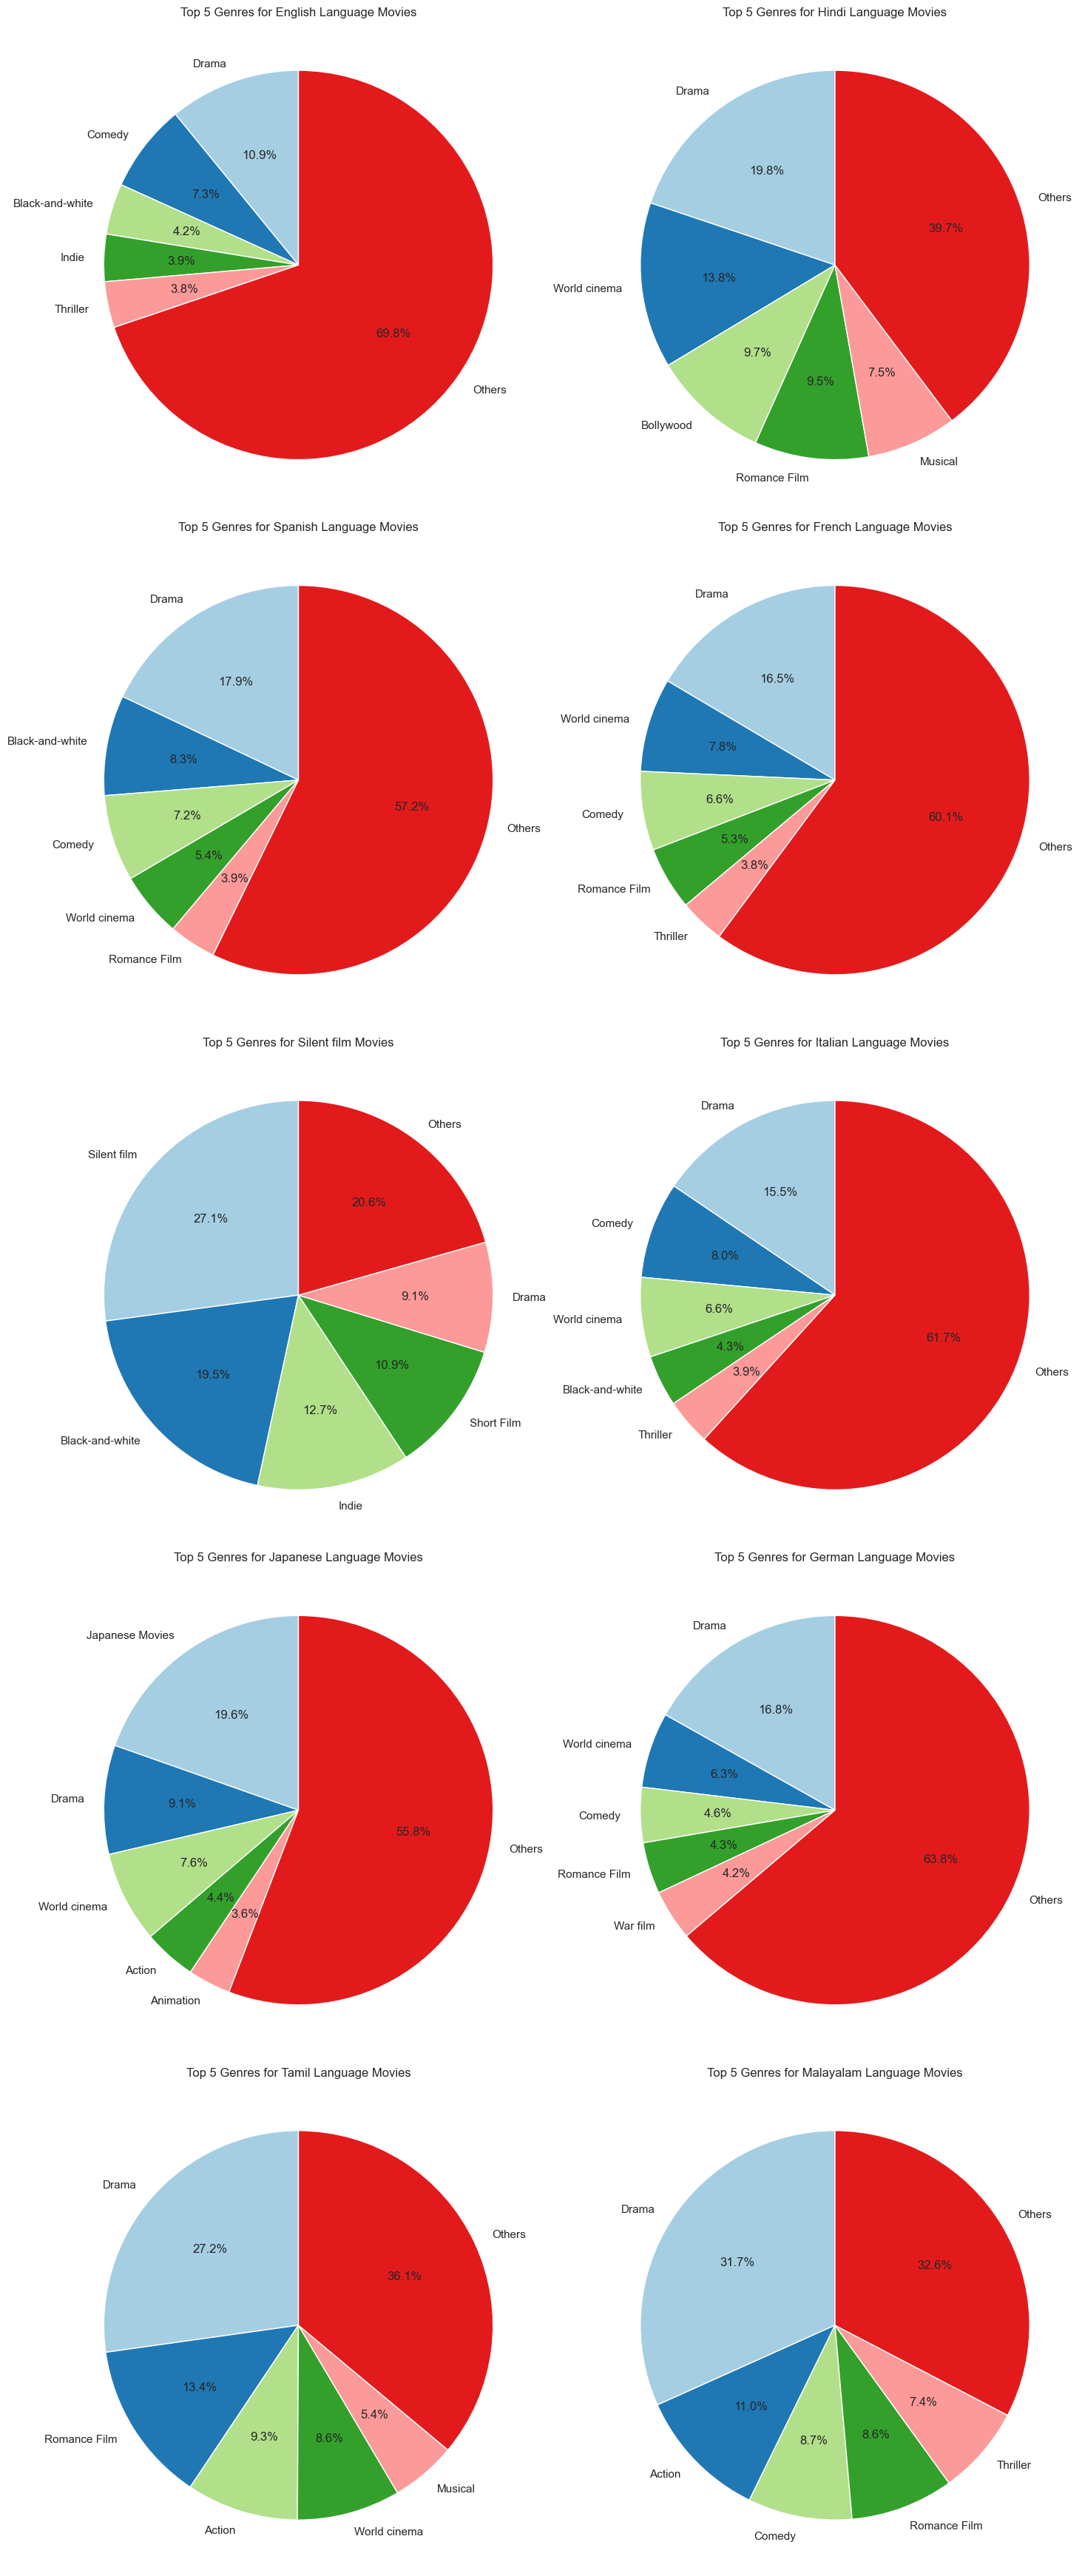

In [12]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Number of languages for which we will create separate pie charts for genres
top_languages_count_genres = 10  

top_languages_genre = df_language_count.head(top_languages_count)

# Number of genres to plot for each language
top_genres_per_language = 5  

# Initialize subplots dynamically based on the number of top languages
nrows = top_languages_count_genres // 2 + top_languages_count_genres % 2  # Adjust for odd counts
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, nrows * 7))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Initialize a list to store DataFrames for each language
dfs_genre_breakdown = []

# Iterate over the top languages
for i, language in enumerate(top_languages_genre['Language']):
    # Filter the DataFrame for the current language
    df_language = movie_summaries[movie_summaries['Movie_languages_clean'].apply(lambda x: language in x)]
    
    # Count the genres for the current language
    genres_count_language = {}
    for genres in df_language['Movie_genres_clean']:
        for genre in genres:
            if genre in genres_count_language:
                genres_count_language[genre] += 1
            else:
                genres_count_language[genre] = 1
    
    # Convert the dictionary to a pandas DataFrame
    df_genre_count_language = pd.DataFrame(list(genres_count_language.items()), columns=['Genre', 'Movie Count'])
    
    # Select the top genres and combine the rest into 'Others'
    top_genres = df_genre_count_language.nlargest(top_genres_per_language, 'Movie Count')
    others_count = df_genre_count_language['Movie Count'].sum() - top_genres['Movie Count'].sum()
    others_row = pd.DataFrame({'Genre': ['Others'], 'Movie Count': [others_count]})
    
    # Concatenate the top genres and 'Others'
    df_genre_count_language = pd.concat([top_genres, others_row])
    
    # Add the language information
    df_genre_count_language['Language'] = language
    
    # Calculate the percentage of each genre
    df_genre_count_language['Percentage'] = (df_genre_count_language['Movie Count'] / df_genre_count_language['Movie Count'].sum()) * 100
    
    # Append the DataFrame to the list
    dfs_genre_breakdown.append(df_genre_count_language)


    # Plotting pie charts for each language
    if i < top_languages_count_genres:
        ax = axes[i]
        ax.pie(df_genre_count_language['Percentage'], labels=df_genre_count_language['Genre'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Paired"))
        ax.set_title(f'Top {top_genres_per_language} Genres for {language} Movies')



# Hide empty subplots
for j in range(len(top_languages_genre['Language']), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Concatenate the DataFrames for all languages
df_combined_genre_breakdown = pd.concat(dfs_genre_breakdown)

# # Create a separate legend
# legend_labels = df_combined_genre_breakdown['Genre'].unique()
# legend_colors = sns.color_palette("Paired", n_colors=len(legend_labels))
# fig.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.15, 0.9))

# Show the plot
plt.show()


Across languages, "Drama" is consistently one of the top genres, indicating its widespread popularity. The global presence of World cinema across different language categories may reflect the process of globalization in the film industry. Furthermore, the strong representation of Bollywood in Hindi films reflects the dominant Indian film industry, known for its vibrant storytelling and musical elements, while the emphasis on Animation in Japanese films may reflect the country's global recognition in the form of anime.

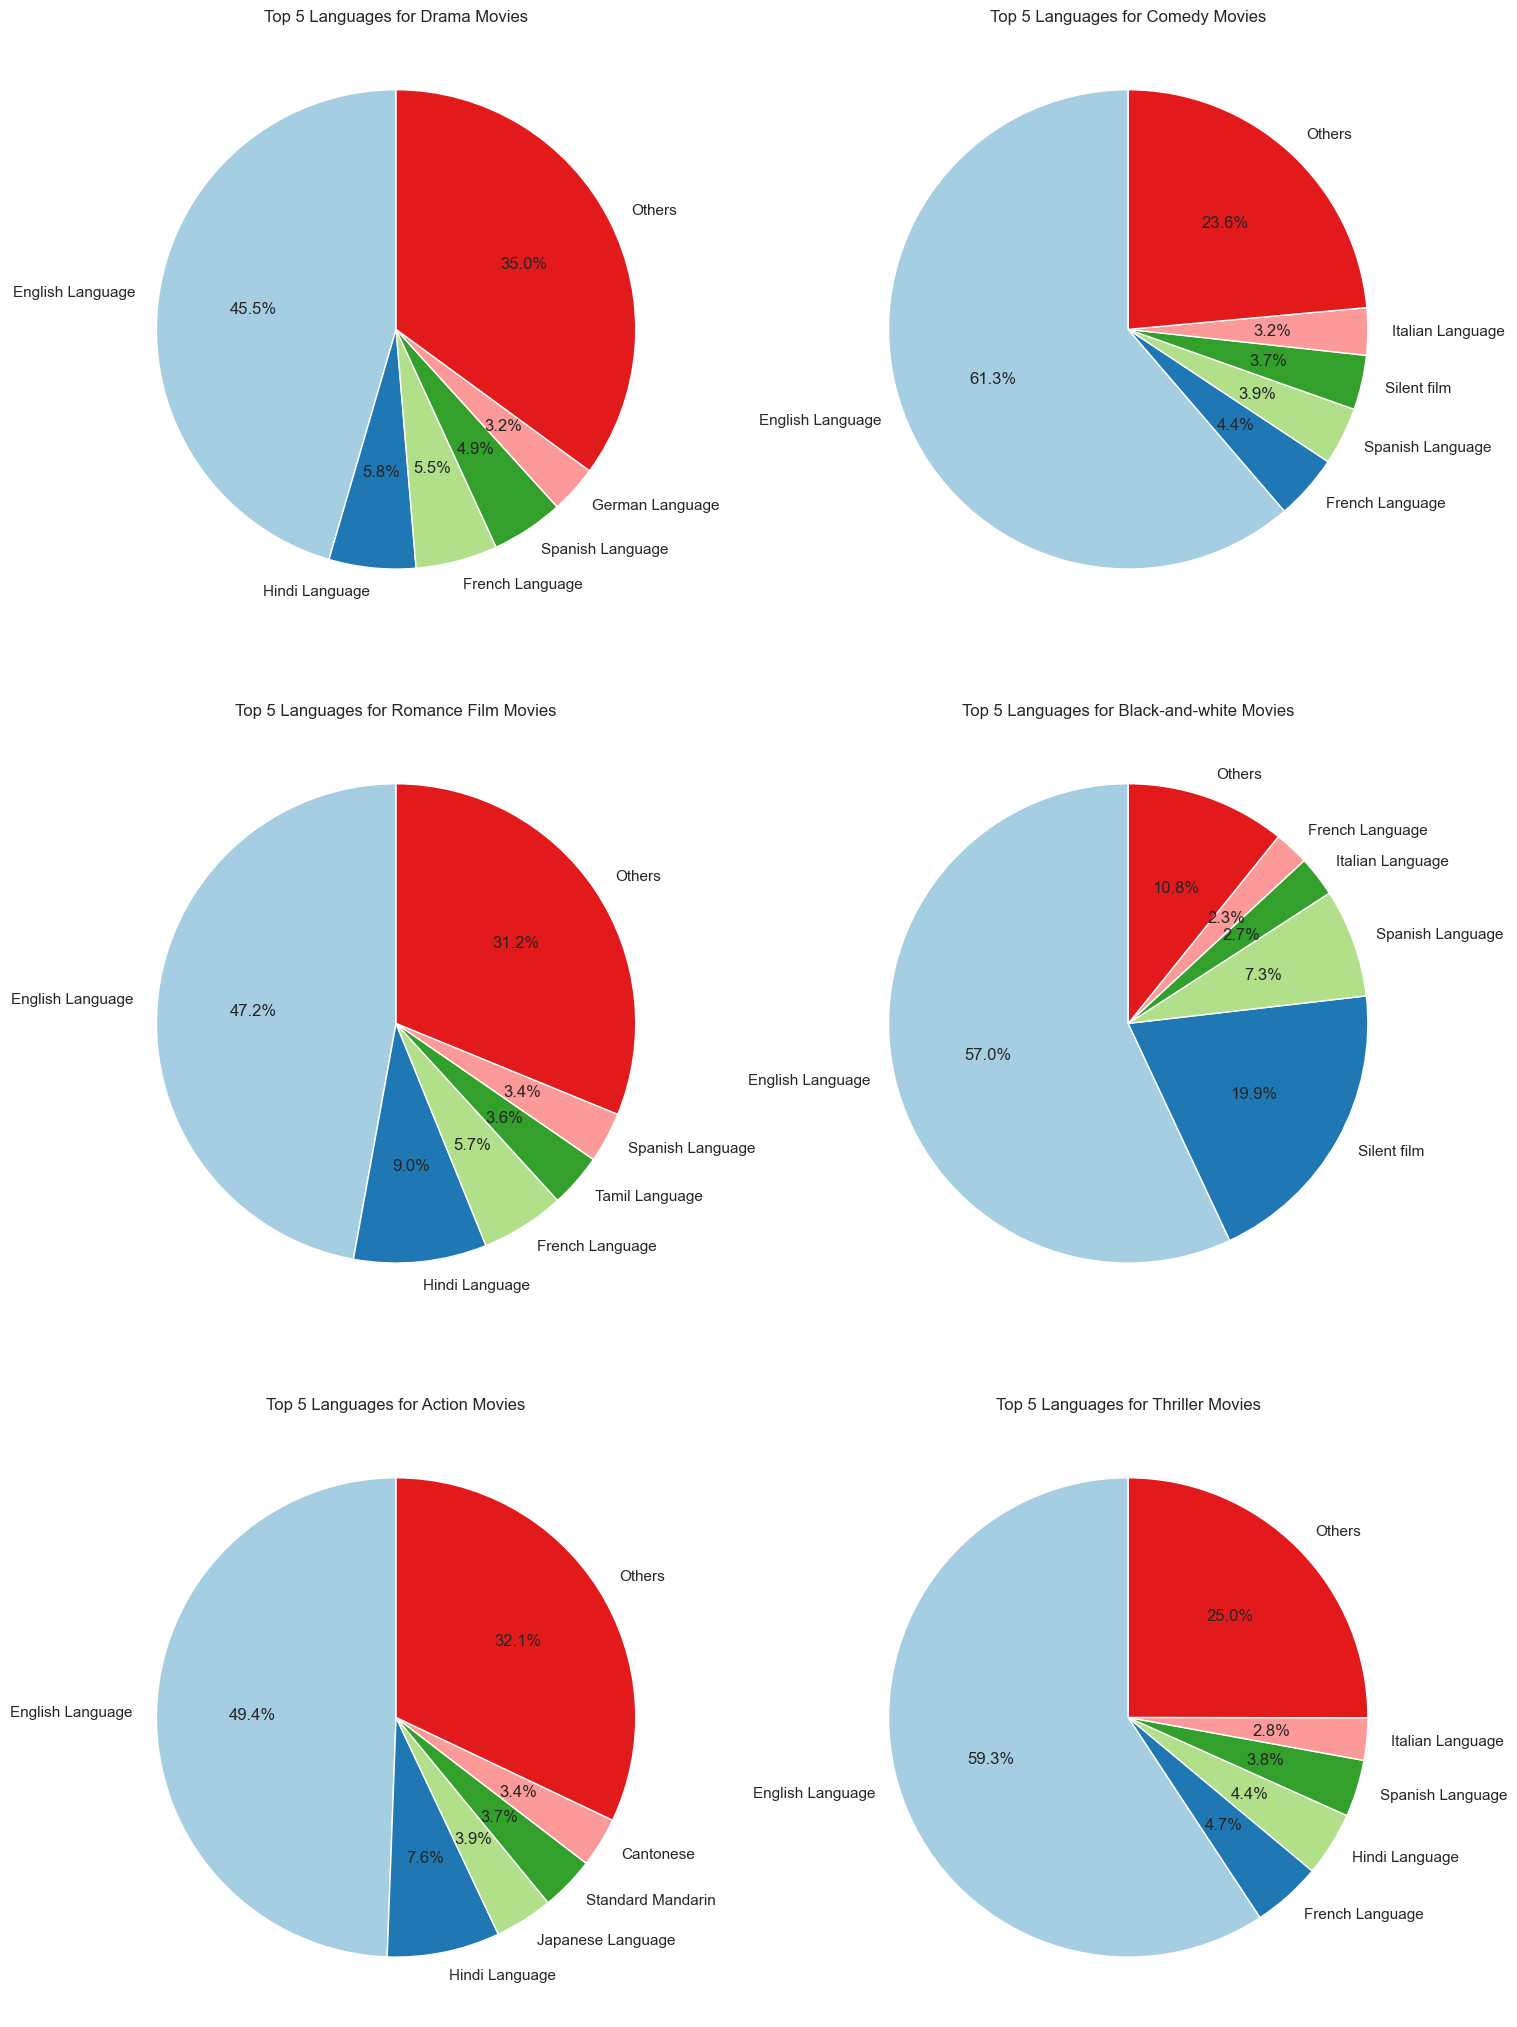

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set(style="whitegrid")

# Number of genres for which we will create separate pie charts for languages
top_genre_count_languages = 6  # Adjust as needed
top_genres = df_genres_count.head(top_genre_count_languages)

# Number of languages to plot for each genre
top_languages_per_genre = 5  

# Initialize subplots dynamically based on the number of top genres
nrows = top_genre_count_languages // 2 + top_genre_count_languages % 2  # Adjust for odd counts
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, nrows * 7))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Initialize a list to store DataFrames for each genre
dfs_language_breakdown = []

# Iterate over the top genres
for i, genre in enumerate(top_genres['Genre']):
    # Filter the DataFrame for the current genre
    df_genre = movie_summaries[movie_summaries['Movie_genres_clean'].apply(lambda x: genre in x)]
    
    # Count the languages for the current genre
    languages_count_genre = {}
    for languages in df_genre['Movie_languages_clean']:
        for language in languages:
            if language in languages_count_genre:
                languages_count_genre[language] += 1
            else:
                languages_count_genre[language] = 1
    
    # Convert the dictionary to a pandas DataFrame
    df_language_count_genre = pd.DataFrame(list(languages_count_genre.items()), columns=['Language', 'Movie Count'])
    
    # Select the top languages and combine the rest into 'Others'
    top_languages_genre = df_language_count_genre.nlargest(top_languages_per_genre, 'Movie Count')
    others_count_genre = df_language_count_genre['Movie Count'].sum() - top_languages_genre['Movie Count'].sum()
    others_row_genre = pd.DataFrame({'Language': ['Others'], 'Movie Count': [others_count_genre]})
    
    # Concatenate the top languages and 'Others'
    df_language_count_genre = pd.concat([top_languages_genre, others_row_genre])
    
    # Add the genre information
    df_language_count_genre['Genre'] = genre
    
    # Append the DataFrame to the list
    dfs_language_breakdown.append(df_language_count_genre)

    # Plotting pie charts for each genre
    if i < top_genre_count_languages:
        ax = axes[i]
        ax.pie(df_language_count_genre['Movie Count'], labels=df_language_count_genre['Language'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Paired"))
        ax.set_title(f'Top {top_languages_per_genre} Languages for {genre} Movies')


# Hide empty subplots
for j in range(len(top_genres['Genre']), len(axes)):
    fig.delaxes(axes[j])

# Add a legend on the side
# fig.legend(df_language_count_genre['Language'].unique(), loc='center right', bbox_to_anchor=(1.1, 0.5), title='Languages')
plt.tight_layout()
plt.show()


English stands out as the dominant language in all genres, which is expected given its widespread use and the substantial presence of English-language movies in the dataset. This suggests that one must look beyond english to gain deeper insights, Exploring genres beyond English-language films could reveal more nuanced trends and preferences within different language communities. 
The tronglreepresentation of silent films within the black-and-white genr, less pronounced in other genre breakdowns,t can be attributed to historical reason as dDuring the early years of cinema, many films were produced without sound and in black and white.

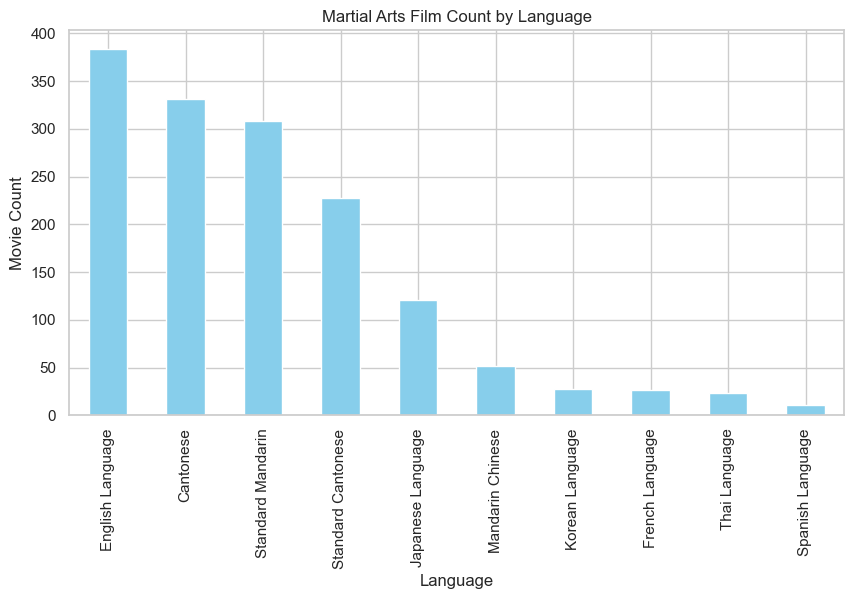

In [14]:
# Count Martial Arts Film by Language
martial_arts_count = movie_summaries[movie_summaries['Movie_genres_clean'].apply(lambda x: 'Martial Arts Film' in x)]['Movie_languages_clean'].explode().value_counts()

# Number of languages that will be represented in the plot
threshold = 10  

# Filter languages based on the threshold
top_languages_martial = martial_arts_count.head(threshold)

# Plot the bar chart
plt.figure(figsize=(10, 5))
top_languages_martial.plot(kind='bar', color='skyblue')
plt.title('Martial Arts Film Count by Language')
plt.xlabel('Language')
plt.ylabel('Movie Count')
plt.show()

While English-language martial arts films outnumber those in other languages, the genre also demonstrates strong representation in Asian languages such as Cantonese, Standard Mandarin, Japanese.  The dataset's dominance by English-language films may skew the overall counts, but the substantial presence of Asian languages reaffirms the genre's profound connection to East Asian cultures.

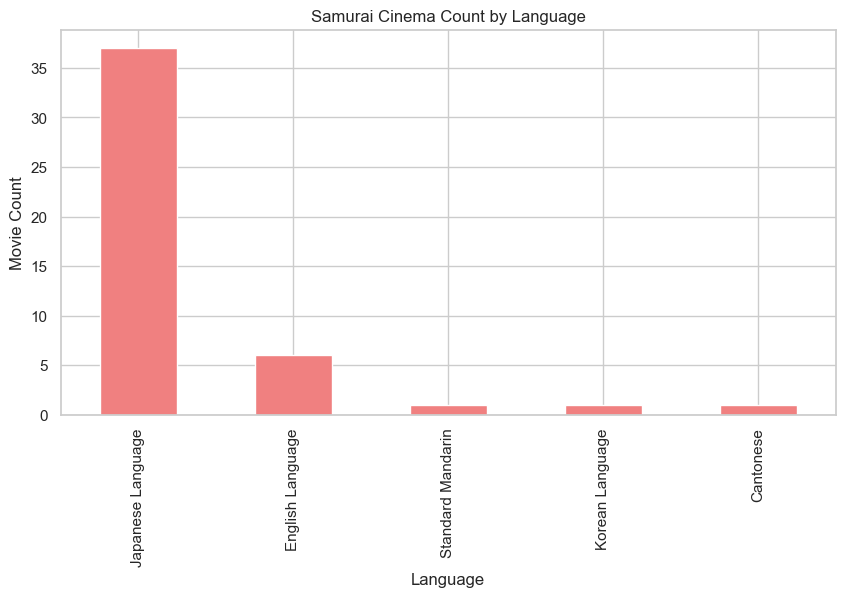

In [15]:
# Count Samurai cinema by Language
samurai_count = movie_summaries[movie_summaries['Movie_genres_clean'].apply(lambda x: 'Samurai cinema' in x)]['Movie_languages_clean'].explode().value_counts()

# Set a threshold for the total number of languages to be represented in the plot
threshold = 10  # Adjust as needed

# Filter languages based on the threshold
top_languages_samurai = samurai_count.head(threshold)

# Plot the bar chart
plt.figure(figsize=(10, 5))
top_languages_samurai.plot(kind='bar', color='lightcoral')
plt.title('Samurai Cinema Count by Language')
plt.xlabel('Language')
plt.ylabel('Movie Count')
plt.show()

The data indicates that the "Samurai cinema" genre is predominantly present in Japanese movies, aligning with the expectation that this genre is a significant part of Japan's cinematic heritage. The majority of occurrences (37 out of 46) are in the Japanese language, emphasizing the cultural specificity of the genre.

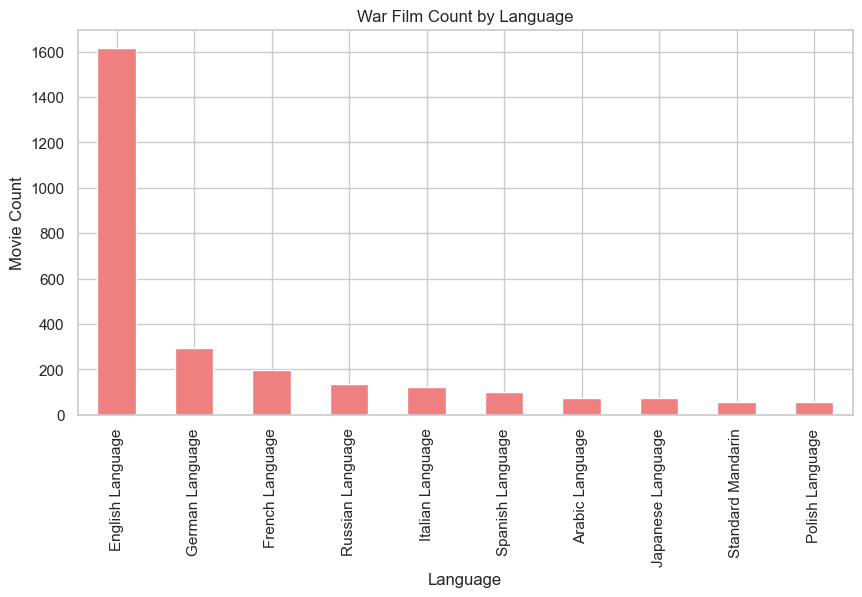

In [16]:
# Count War films by Language
war_film_by_language = movie_summaries[movie_summaries['Movie_genres_clean'].apply(lambda x: 'War film' in x)]['Movie_languages_clean'].explode().value_counts()

# Set a threshold for the total number of languages to be represented in the plot
threshold = 10  

# Filter languages based on the threshold
top_languages_war = war_film_by_language.head(threshold)

# Plot the bar chart 
plt.figure(figsize=(10, 5))
top_languages_war.plot(kind='bar', color='lightcoral')
plt.title('War Film Count by Language')
plt.xlabel('Language')
plt.ylabel('Movie Count')

plt.show()

An interesting observation here is the lower presence of languages like Hindi and Tamil in the 'War film' genre, despite their higher representation in general movie counts. This could be due to regional preferences, especially in India, where war films may not be as favored as other genres. On the other hand, the notable increase in popularity of German language movies in this genre stands out. German isn't as popular in the general movie counts as it is in this genre.

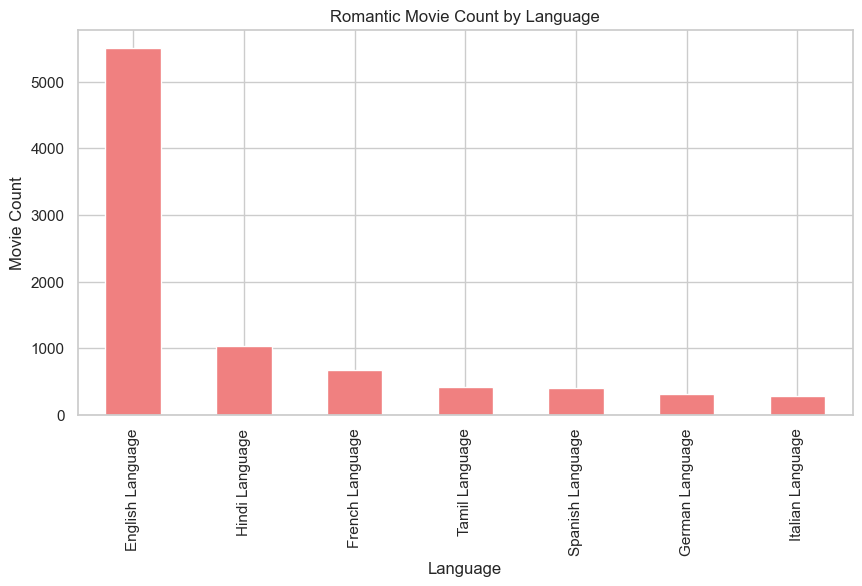

In [17]:
# Count Romantic movies by Language
romantic_languages = movie_summaries[movie_summaries['Movie_genres_clean'].apply(lambda x: 'Romance Film' in x or 'Romantic drama' in x)]['Movie_languages_clean'].explode().value_counts()

# Number of languages to be represented in the plot
threshold = 7  

# Filter languages based on the threshold
top_languages_romantic = romantic_languages.head(threshold)

plt.figure(figsize=(10, 5))
top_languages_romantic.plot(kind='bar', color='lightcoral')
plt.title('Romantic Movie Count by Language')
plt.xlabel('Language')
plt.ylabel('Movie Count')

plt.show()


The language distribution in this genreresembless the global representation across all genres, emphasizing English dominance and higher counts for Hindi, Tamil, Spanish, and French, in alignment with the overall language breakdown.eakdown.

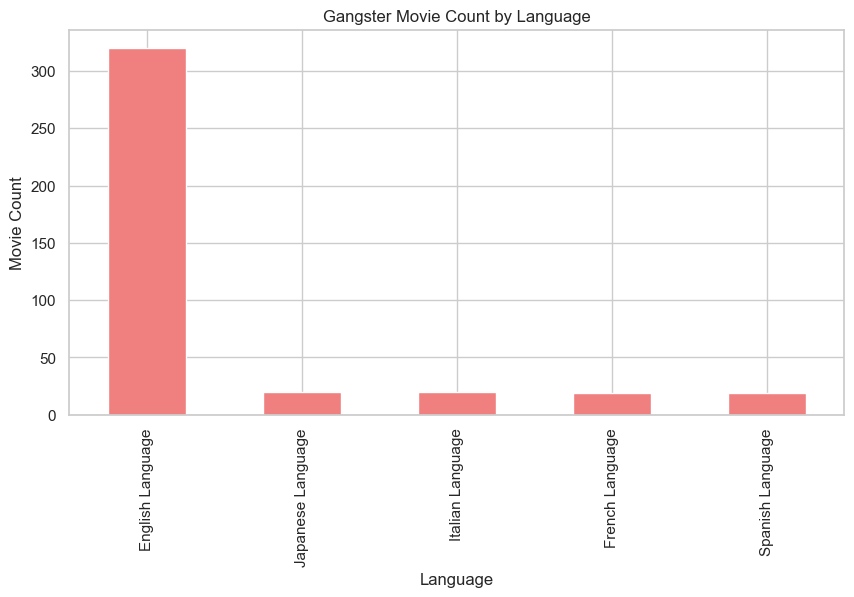

In [18]:
# Count Gangster movies by Language
gangster_language_diversity = movie_summaries[movie_summaries['Movie_genres_clean'].apply(lambda x: 'Gangster Film' in x)]['Movie_languages_clean'].explode().value_counts()

# Number of languages to be represented in the plot
threshold = 5  

# Filter languages based on the threshold
top_languages_gangster = gangster_language_diversity.head(threshold)

# Plot the bar chart 
plt.figure(figsize=(10, 5))
top_languages_gangster.plot(kind='bar', color='lightcoral')
plt.title('Gangster Movie Count by Language')
plt.xlabel('Language')
plt.ylabel('Movie Count')

plt.show()


Looking at the data,we can observe certain stereotypical associations between Japan and gangsters, as well as Italy and gangsters, that seem to be reflected and captured in cinema.. In Japanese cinema, gangster portrayals often revolve around the Yakuza, a notorious organized crime syndicate that frequently appears in Japanese gangster films  Similarly, Italian cinema, especially in Hollywood,is often associated with Mafia depictions. The American Mafia, rooted in Italian organized crime, prominently features in gangster films, as seen in classics like "The Godfather" trilogy, portraying the Italian-American Mafia.


.

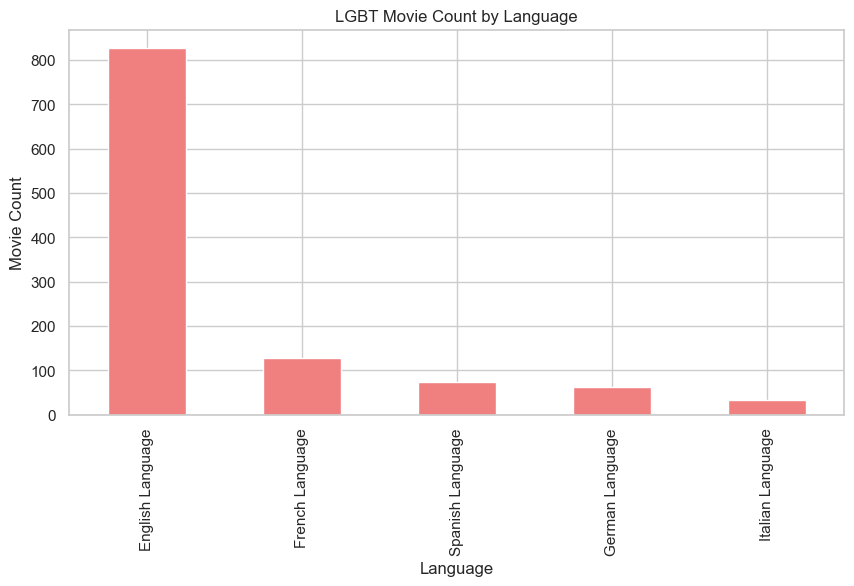

In [19]:
# Count LGBT-themed movies by Language
lgbt_language_diversity = movie_summaries[movie_summaries['Movie_genres_clean'].apply(lambda x: 'LGBT' in x or 'Gay Interest' in x or 'Gay Themed' in x)]['Movie_languages_clean'].explode().value_counts()

# Number of languages to be represented in the plot
threshold = 5  

# Filter languages based on the threshold
top_languages_lgbt = lgbt_language_diversity.head(threshold)

# Plot the bar chart
plt.figure(figsize=(10, 5))
top_languages_lgbt.plot(kind='bar', color='lightcoral')
plt.title('LGBT Movie Count by Language')
plt.xlabel('Language')
plt.ylabel('Movie Count')
plt.show()

The non-presence of Hindi and Tamil languages, otherwise very much present in the general language distribution, may suggest the non-penetrance of LGBTQ themes or a lack of societal acceptance of such themes in India and other comparable developing countries